In [ ]:
from numpy import vectorize
from quantities import UnitQuantity, m, s, us
from pandas import DataFrame
from sympy import latex
from IPython.display import display, Math
import re

def Units(x, units):
    x.units = units
    return x

def Latex(x):
                  #r"(\\mathtt\{)?(\\text\{([^{}]+)\})(\})?"
    return re.sub(r"(\\mathtt\{)?(\\text\{([^{}]+)\})(\})?", r"\2", latex(x))

light_speed = 299792458 * m/s

c = UnitQuantity('c', light_speed)

Ft = UnitQuantity('Ft', 0.304799999536704*m)

# Pre-lab Section
Consider the schematic captured from ADS that is shown in Figure 3.1.  Note that a load impedance of 50MΩ is shown, but you will be making calculations and simulations with several different values of load impedance.  Given that the transmission line comprises a coaxial cable with dielectric constant of 2.1, calculate the velocity of propagation and the time that it takes for a disturbance at the generator end of the line to arrive at the load T for a cable of length 1000 feet. Record these values in the appropriate locations in Table 1 for comparison to the values obtained during the simulation experiment.


In [141]:
'''assuming lossless cable, as insufficient information is provided to calculate it for a lossy cable'''
def prop_velocity(epsilon_r):
    return light_speed/sqrt(epsilon_r)

v_p = prop_velocity(epsilon_r = 2.1).simplified

time_delay_theory = Units((1000*Ft/v_p), us)

display(Math(f'\\text{{Velocity of propagation}} = {Latex("{:.3E}".format(v_p))} = '
             f'{Latex(round(Units(v_p, c), 4).magnitude)} c'))

display(Math(f'\\text{{Time delay}} = {Latex(round(time_delay_theory, 3))}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
latex("{:.3E}".format(v_p))

Assuming that the transmission line has characteristic impedance $Z_0 = 50 \Omega$
, calculate the reflection coefficient $\Gamma_L$ for the following load terminations:
1. $Z_L = \infty$
2. $Z_L = 100\Omega$

3. $Z_L = 50\Omega$

4. $Z_L = 25\Omega$

5. $Z_L = 0$

Record these values in the $\Gamma_L$ (Theory) column in Table 2 for comparison
to the values obtained during the simulation experiment. Analyze the circuit
shown in Fig.3.1 to determine the theoretical values for the amplitudes of
the incident pulse, the reflected pulse, and the peak value of the load voltage
for each value of the load termination. Record these values in the appropriate columns 
of Table 3 for comparison to the values obtained during the
simulation experiment.

# Lab Section

### Theoretical and Simulated Values of Travel Times

In [ ]:
DataFrame({'T (us) (Theory)': time_delay_theory, 'T (us) (Simulation)': })

### Theoretical and Simulated Values of $\Gamma_L$

In [ ]:
infinity = np.inf
@vectorize
def Gamma_L(Z0, ZL):
  if ZL != infinity: 
    sum = ZL+Z0
    difference = ZL-Z0
    return difference/sum
  else: # limit of above formula, as ZL goes to infinity, is 1
    return 1.0


ZL = [infinity, 100, 50, 25, 0]
Gamma_Theory = Gamma_L(Z0 = 50, ZL = ZL)

Gamma_simulation = [0.499/0.5, 0.167/0.5, (-4.33E-4)/0.5, -0.166/0.5, -0.499/0.5]
print('\n')
display(Math('\\text{Table 2}'))
DataFrame({'Z_L (Ohms)':ZL, 'Gamma_L (Theory)': Gamma_L(Z0 = 50, ZL = ZL), 'Gamma_L (Simulation)': Gamma_simulation})

### Theoretical and Simulated Values of Pulse Amplitudes

In [ ]:
@vectorize
def V_ref(V_inc, Gamma):
    return V_inc*Gamma

@vectorize
def V_load(V_inc, V_ref):
    return V_inc + V_ref


V_inc_theory = [0.500] * 5

V_ref_theory = V_ref(V_inc_theory, Gamma_Theory)

V_load_theory = V_load(V_inc_theory, V_ref_theory)


V_inc_simulation = [0.499, 0.5, 0.5, 0.5, 0.5]

V_ref_simulation =  [0.499, 0.167, -4.33E-4, -0.166, -0.499]

V_load_simulation = [0.999, 0.666, 0.5, 0.333, 0]

print('\n')
display(Math('\\text{Table 3}'))

DataFrame({ 'Z_L (Ohms)' : ZL, 
           'V_inc (V) (Theory)': V_inc_theory, 'V_ref (V) (Theory)': V_ref_theory, 'V_load (V) (Theory)': V_load_theory, 
           'V_inc (V) (Simulation)': V_inc_simulation, 'V_ref (V) (Simulation)': V_ref_simulation, 
           'V_load (V) (Simulation)': V_load_simulation})


### Theoretical and Simulated Values of $\Gamma_L$

In [45]:
infinity = np.inf
@vectorize
def Gamma_L(Z0, ZL):
  if ZL != infinity: 
    sum = ZL+Z0
    difference = ZL-Z0
    return difference/sum
  else: # limit of above formula, as ZL goes to infinity, is 1
    return 1.0


ZL = [infinity, 100, 50, 25, 0]
Gamma_Theory = Gamma_L(Z0 = 50, ZL = ZL)

Gamma_simulation = [0.499/0.5, 0.167/0.5, (-4.33E-4)/0.5, -0.166/0.5, -0.499/0.5]
print('\n')
display(Math('\\text{Table 2}'))
DataFrame({'Z_L (Ohms)':ZL, 'Gamma_L (Theory)': Gamma_L(Z0 = 50, ZL = ZL), 'Gamma_L (Simulation)': Gamma_simulation})

<IPython.core.display.Math object>

,Z_L (Ohms),Gamma_L (Theory),Gamma_L (Simulation)
0,inf,1.000000,0.998000
1,100.0,0.333333,0.334000
2,50.0,0.000000,-0.000866
3,25.0,-0.333333,-0.332000
4,0.0,-1.000000,-0.998000


### Theoretical and Simulated Values of Pulse Amplitudes

In [44]:
@vectorize
def V_ref(V_inc, Gamma):
    return V_inc*Gamma

@vectorize
def V_load(V_inc, V_ref):
    return V_inc + V_ref


V_inc_theory = [0.500] * 5

V_ref_theory = V_ref(V_inc_theory, Gamma_Theory)

V_load_theory = V_load(V_inc_theory, V_ref_theory)


V_inc_simulation = [0.499, 0.5, 0.5, 0.5, 0.5]

V_ref_simulation =  [0.499, 0.167, -4.33E-4, -0.166, -0.499]

V_load_simulation = [0.999, 0.666, 0.5, 0.333, 0]

print('\n')
display(Math('\\text{Table 3}'))

DataFrame({ 'Z_L (Ohms)' : ZL, 
           'V_inc (V) (Theory)': V_inc_theory, 'V_ref (V) (Theory)': V_ref_theory, 'V_load (V) (Theory)': V_load_theory, 
           'V_inc (V) (Simulation)': V_inc_simulation, 'V_ref (V) (Simulation)': V_ref_simulation, 
           'V_load (V) (Simulation)': V_load_simulation})


<IPython.core.display.Math object>

,Z_L (Ohms),V_inc (V) (Theory),V_ref (V) (Theory),V_load (V) (Theory),V_inc (V) (Simulation),V_ref (V) (Simulation),V_load (V) (Simulation)
0,inf,0.5,0.500000,1.000000,0.499,0.499000,0.999
1,100.0,0.5,0.166667,0.666667,0.500,0.167000,0.666
2,50.0,0.5,0.000000,0.500000,0.500,-0.000433,0.500
3,25.0,0.5,-0.166667,0.333333,0.500,-0.166000,0.333
4,0.0,0.5,-0.500000,0.000000,0.500,-0.499000,0.000


## Plots

$Z_L = \infty$

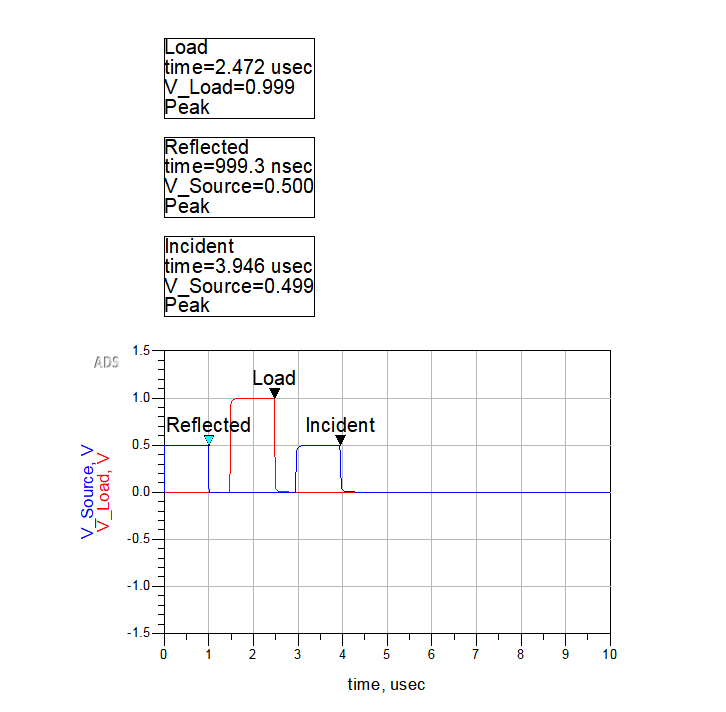

$Z = 100 \Omega$

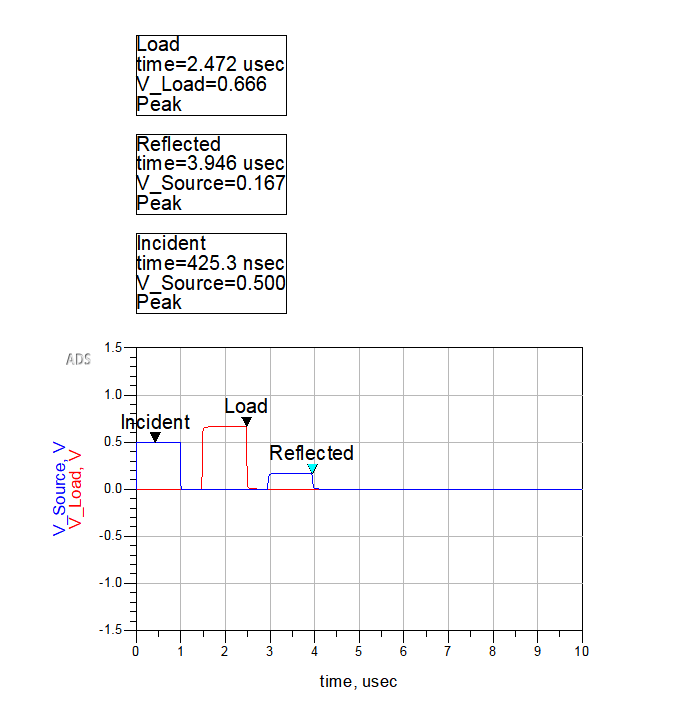

$Z = 50 \Omega$

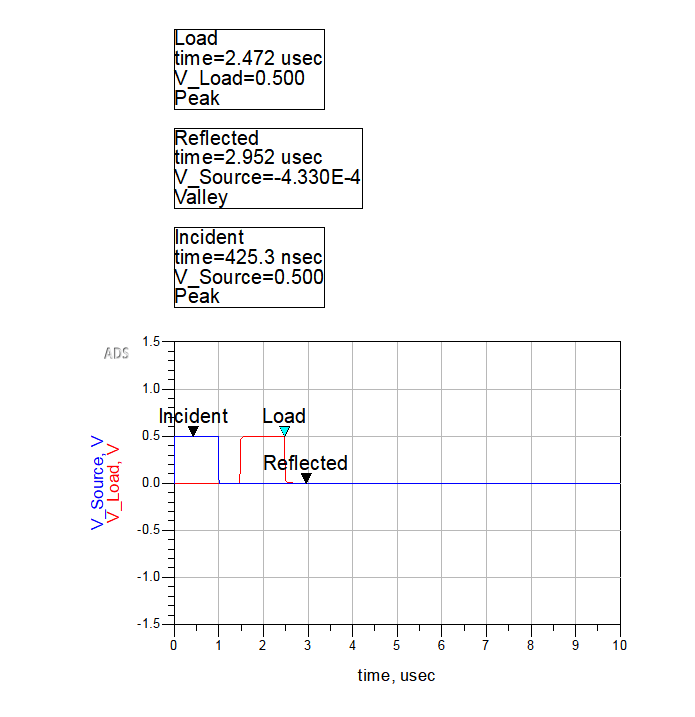

$Z = 25 \Omega$

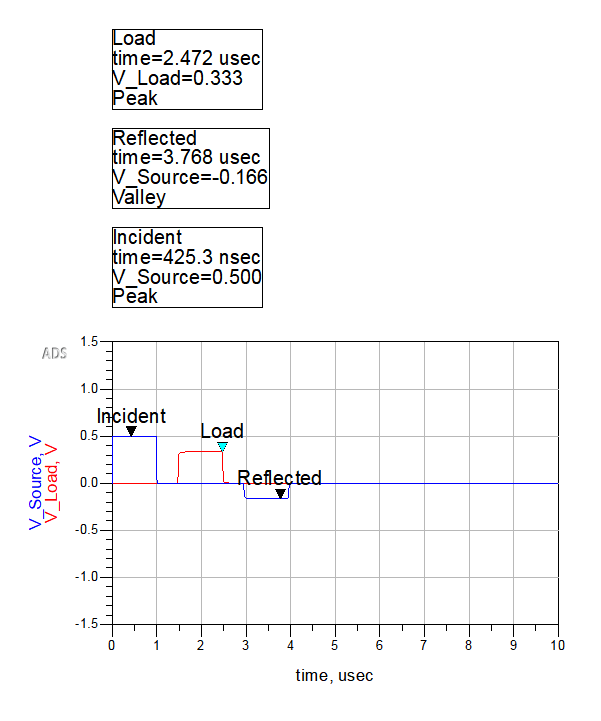

$Z = 0$

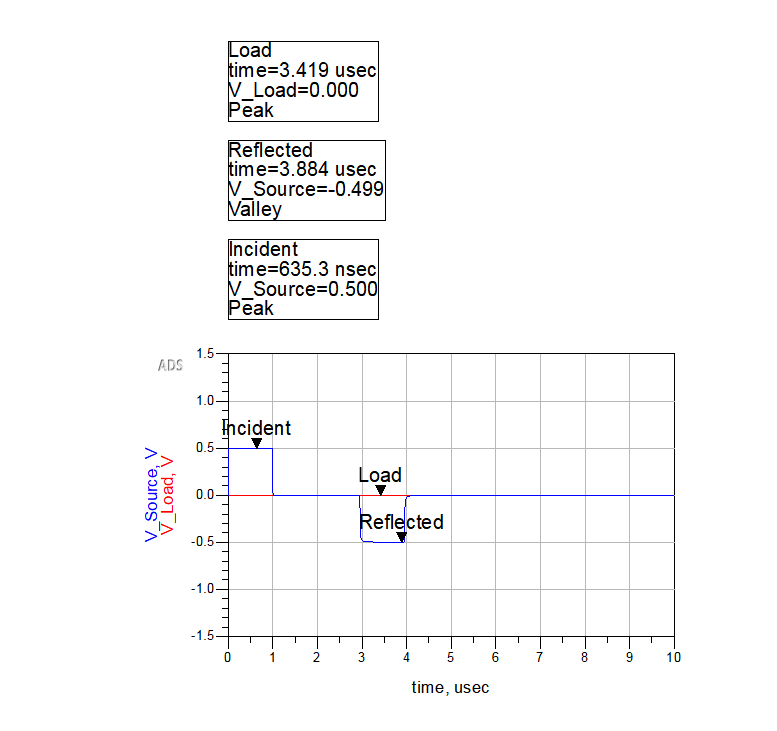